# **Proje Başlangıcı**

## Kütüphanelerin Yüklenmesi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafikler Colab içinde düzgün gözüksün
%matplotlib inline

# Uyarıları kapat
import warnings
warnings.filterwarnings('ignore')

## Dataset'in Yüklenmesi

In [6]:
df = pd.read_csv('/content/customer_experience_data.csv')
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


## Veri Seti Hakkında Temel Bilgiler

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [10]:
df.shape

(1000, 14)

In [8]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


# **EDA (Exploratory Data Analysis)**

Keşifsel Veri Analizi, veri biliminde bir veri setini anlamak, yapısını çözmek ve içindeki örüntüleri (patterns), aykırı değerleri (outliers) ve ilişkileri (correlations) keşfetmek için yapılan ilk ve çok önemli adımdır.

## Eksik Değer Analizi

In [11]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Eksik Değer Sayısı': missing, 'Yüzde (%)': missing_percent})
missing_table[missing_table['Eksik Değer Sayısı'] > 0]

,Eksik Değer Sayısı,Yüzde (%)


## Basit bir EDA İncelemesi

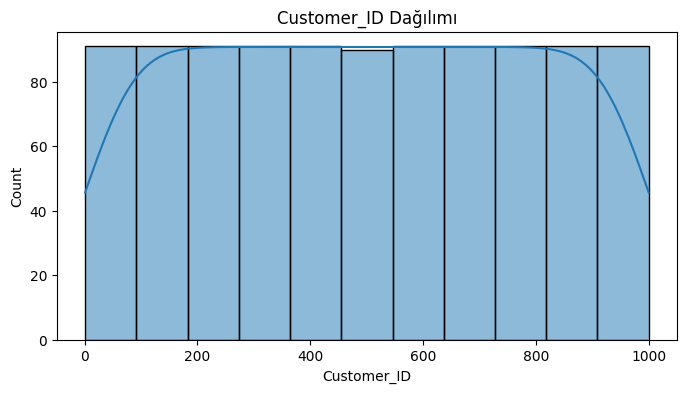

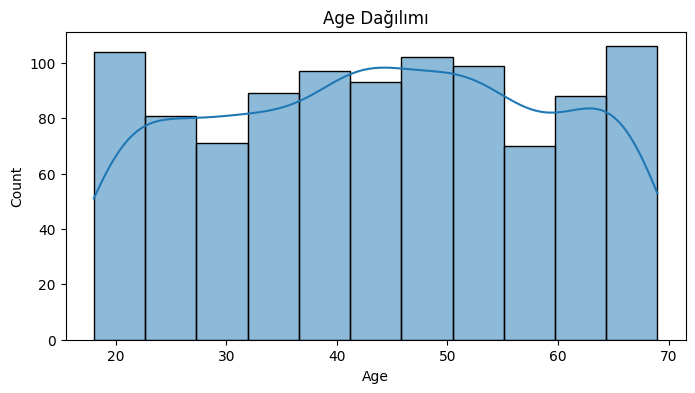

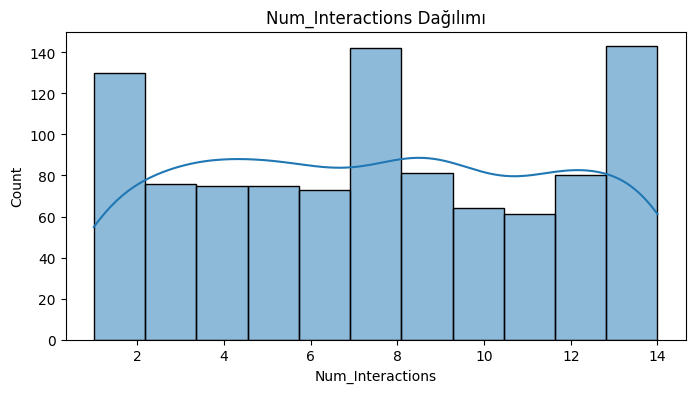

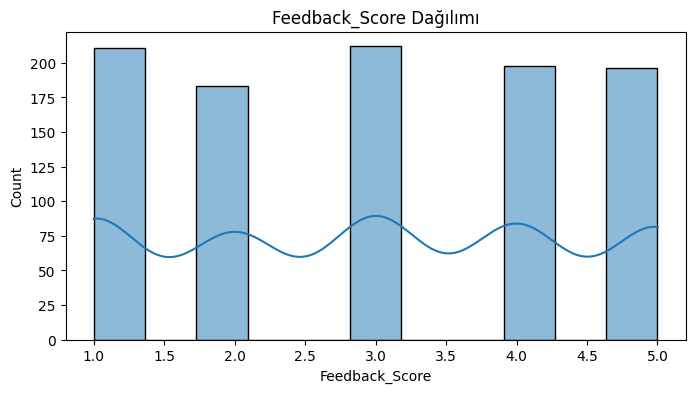

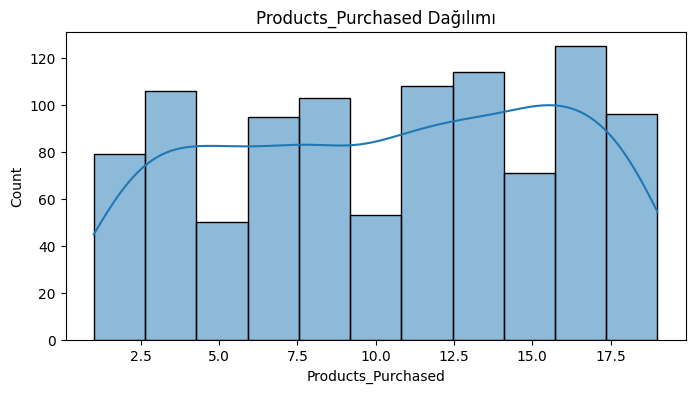

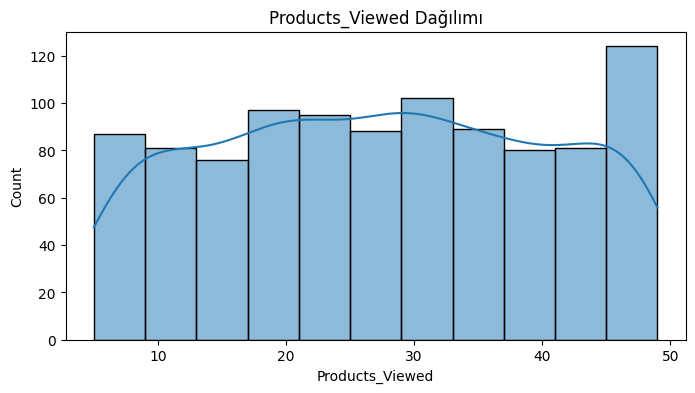

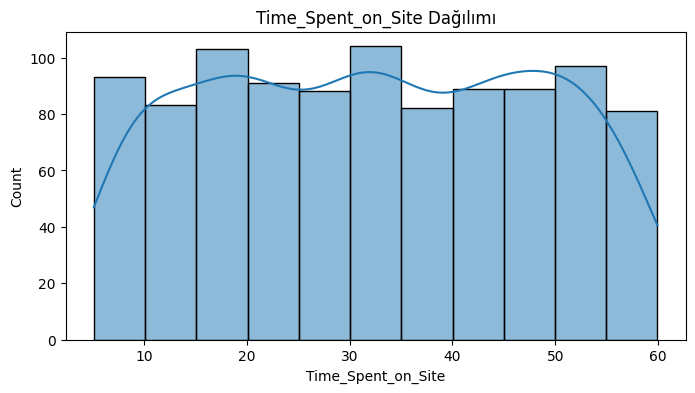

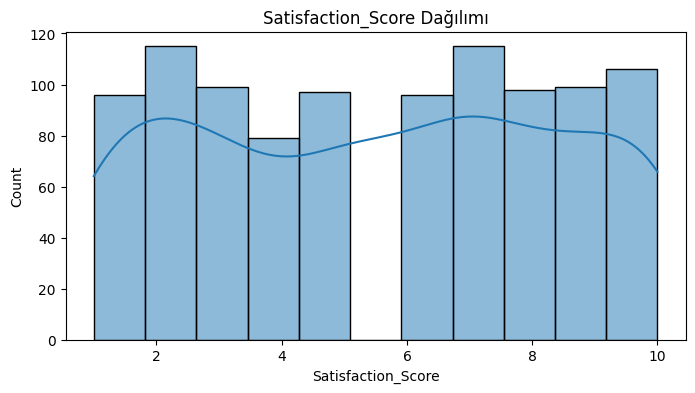

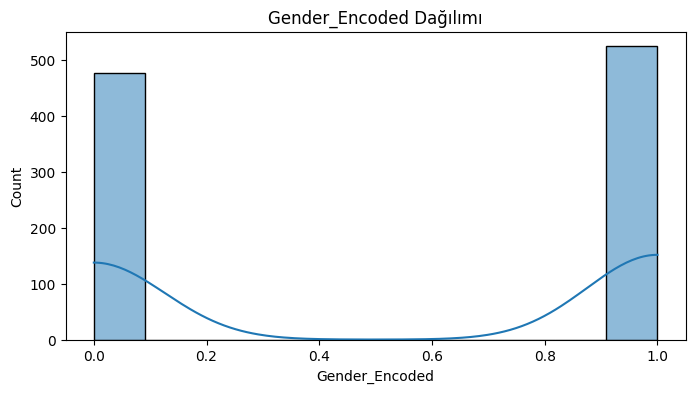

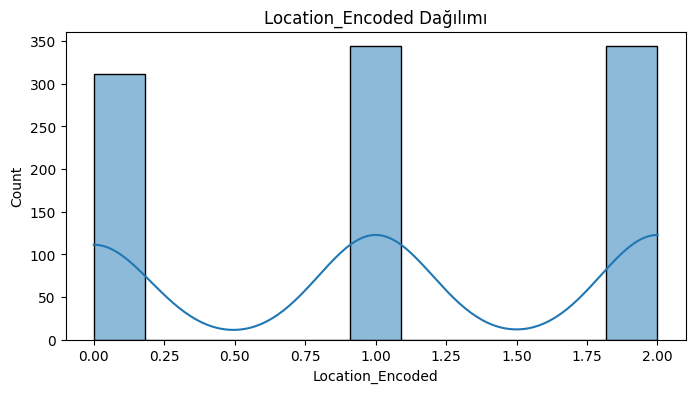

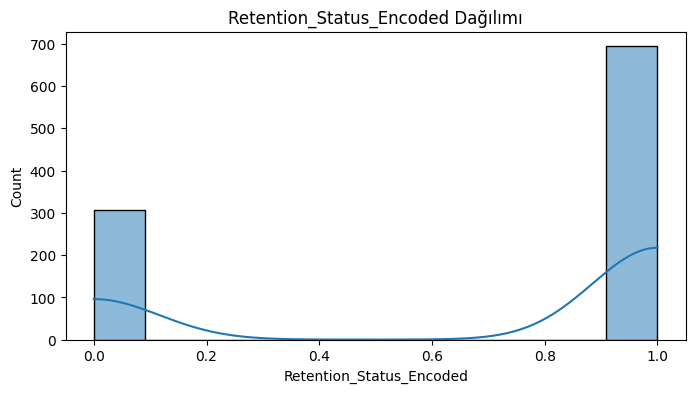

In [21]:
numerics = df.select_dtypes(include=['int64', 'float64'])

# Tüm sayısal sütunları görselleştir
for col in numerics.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()


## Daha Ayrıntılı EDA

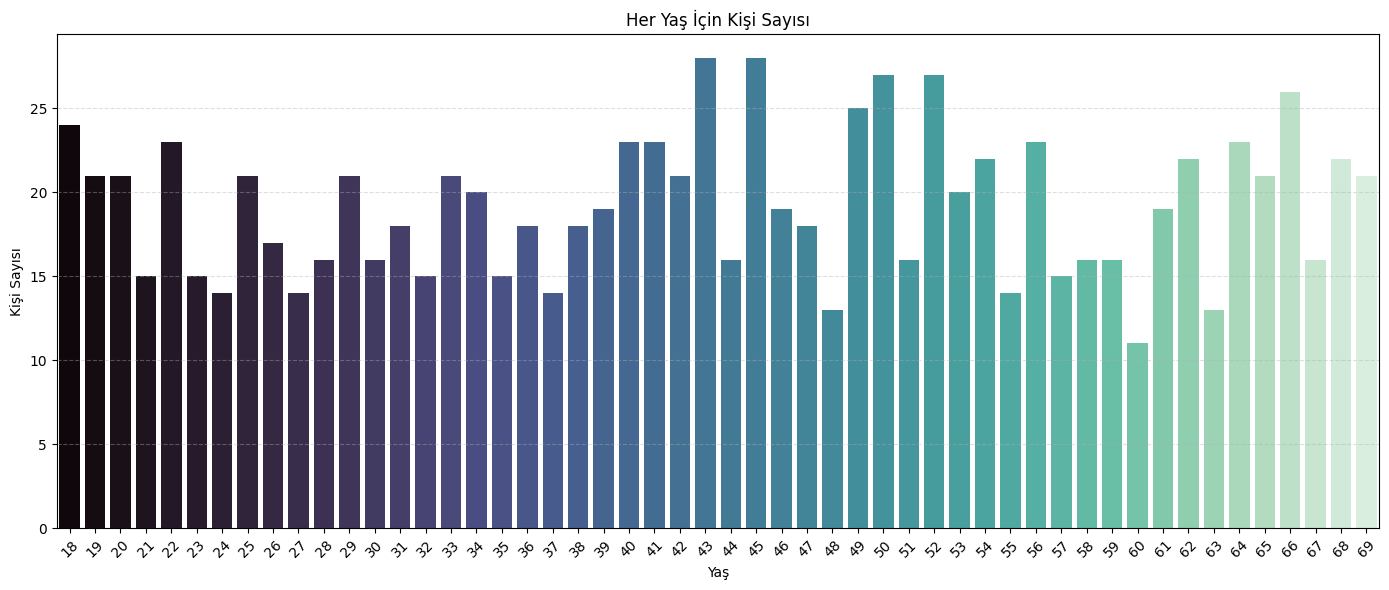

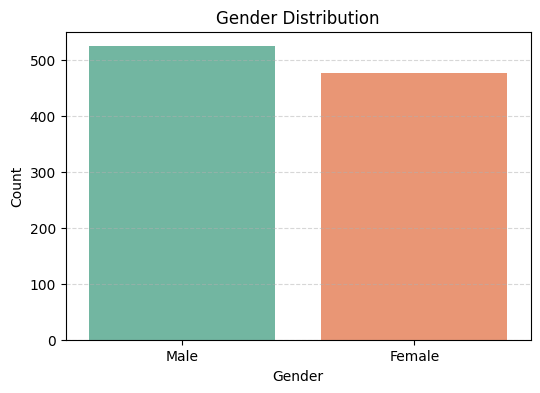

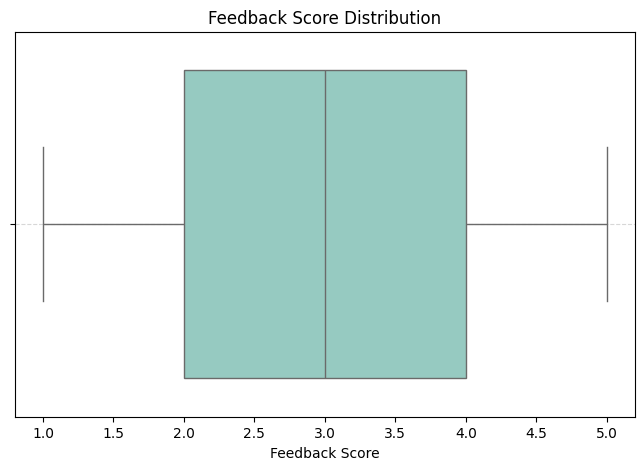

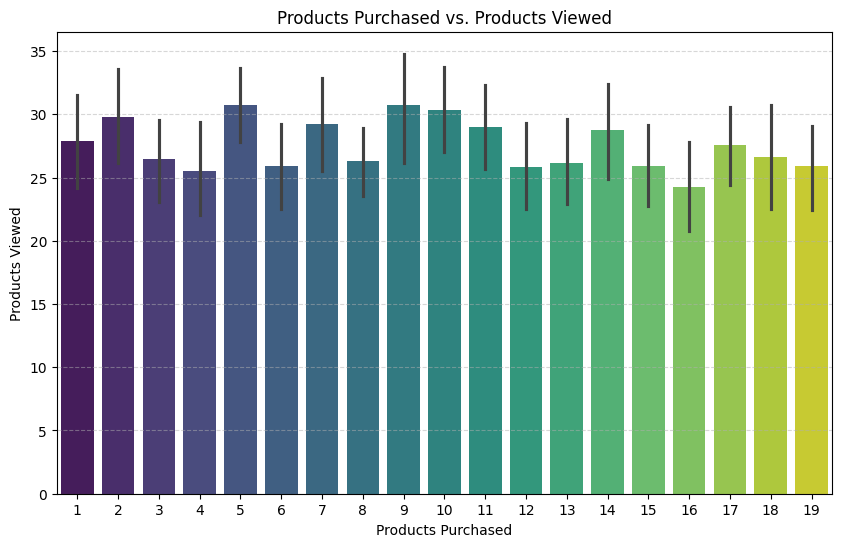

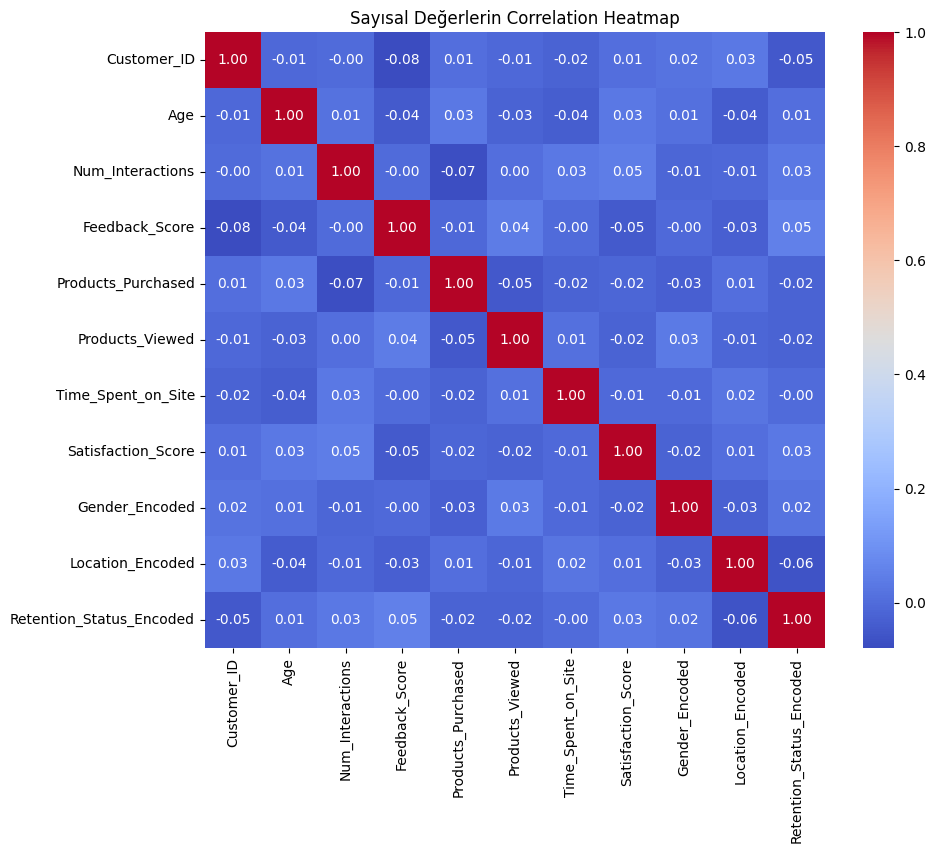

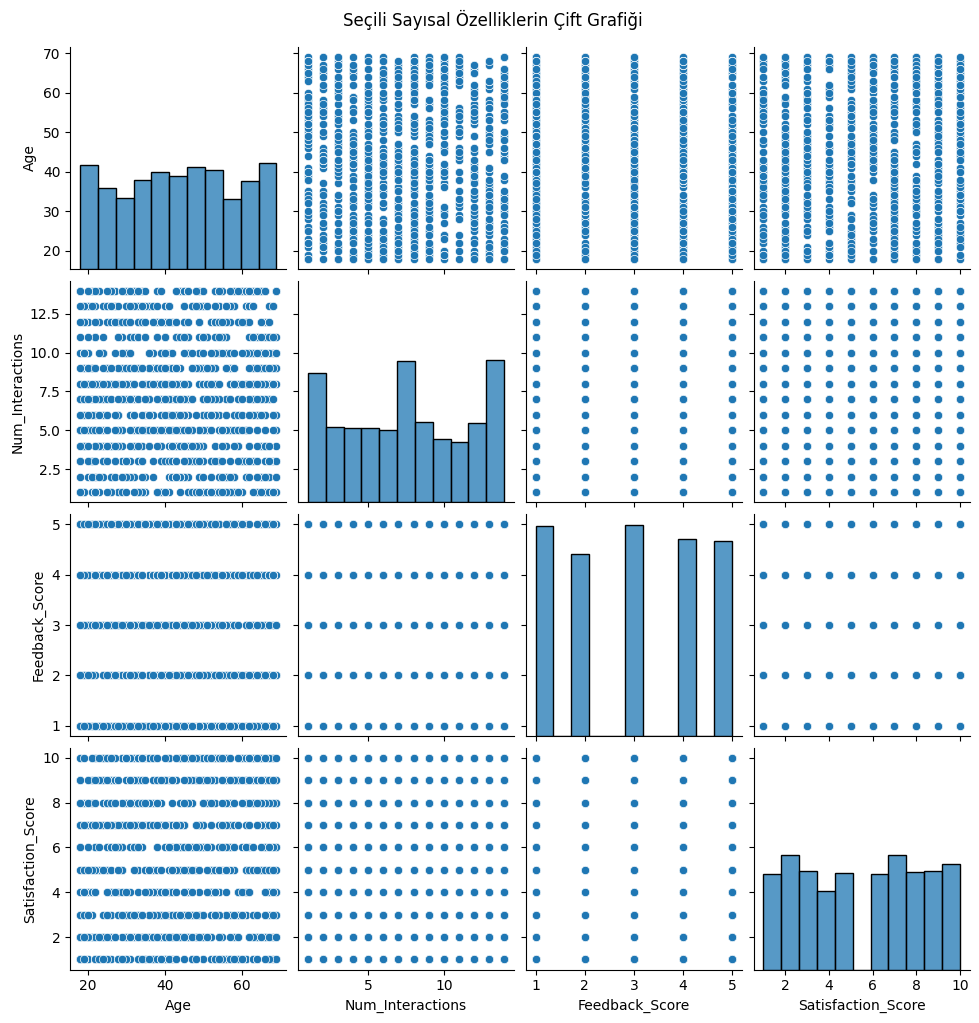

In [33]:
# Histogram for Age distribution
plt.figure(figsize=(14, 6))
age_counts = df['Age'].value_counts().sort_index()  # Yaşları sıraya koyar
sns.barplot(x=age_counts.index, y=age_counts.values, palette='mako')

plt.title('Her Yaş İçin Kişi Sayısı')
plt.xlabel('Yaş')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)  # X eksenindeki yaşları daha okunur hale getirir
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Count plot for Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# Box plot for Feedback Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Feedback_Score', data=df, palette='Set3')
plt.title('Feedback Score Distribution')
plt.xlabel('Feedback Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


# Grouped bar plot for Products Purchased vs. Products Viewed (if relevant)
plt.figure(figsize=(10, 6))
sns.barplot(x='Products_Purchased', y='Products_Viewed', data=df, palette='viridis')
plt.title('Products Purchased vs. Products Viewed')
plt.xlabel('Products Purchased')
plt.ylabel('Products Viewed')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


# Correlation Heatmap (if ≥ 4 numeric columns)
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Sayısal Değerlerin Correlation Heatmap')
    plt.show()


# Seçili Sayısal Özelliklerin Çift Grafiği
selected_cols = ['Age', 'Num_Interactions', 'Feedback_Score', 'Satisfaction_Score']
for col in selected_cols:
    if col not in numeric_df.columns:
        selected_cols.remove(col)

if len(selected_cols) >= 2:
    sns.pairplot(numeric_df[selected_cols])
    plt.suptitle('Seçili Sayısal Özelliklerin Çift Grafiği', y=1.02)
    plt.show()


## Aykırı (Uç) Değer Tespiti ve Görselleştirme

### Sayısal Değişkenlerin Seçilmesi

In [22]:
# Sayısal sütunları seçiyoruz
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score',
       'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site',
       'Satisfaction_Score', 'Gender_Encoded', 'Location_Encoded',
       'Retention_Status_Encoded'],
      dtype='object')

### Her Sütun İçin Aykırı Değerlerin Tespit Edilmesi

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Tüm sayısal sütunlar için aykırı değer sayısı
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} sütununda {len(outliers)} aykırı değer var.")


Customer_ID sütununda 0 aykırı değer var.
Age sütununda 0 aykırı değer var.
Num_Interactions sütununda 0 aykırı değer var.
Feedback_Score sütununda 0 aykırı değer var.
Products_Purchased sütununda 0 aykırı değer var.
Products_Viewed sütununda 0 aykırı değer var.
Time_Spent_on_Site sütununda 0 aykırı değer var.
Satisfaction_Score sütununda 0 aykırı değer var.
Gender_Encoded sütununda 0 aykırı değer var.
Location_Encoded sütununda 0 aykırı değer var.
Retention_Status_Encoded sütununda 0 aykırı değer var.


### Boxplot ile Görselleştirme (Her Sütun İçin)

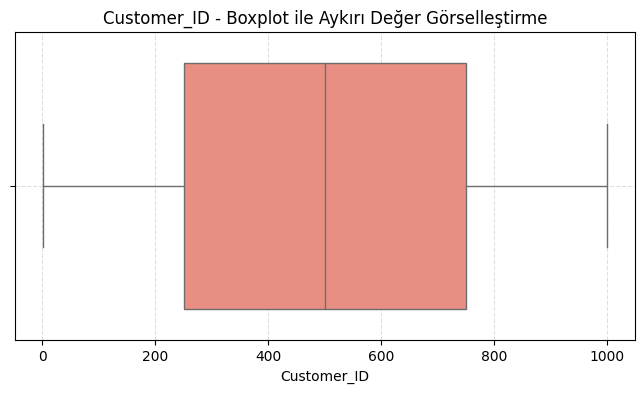

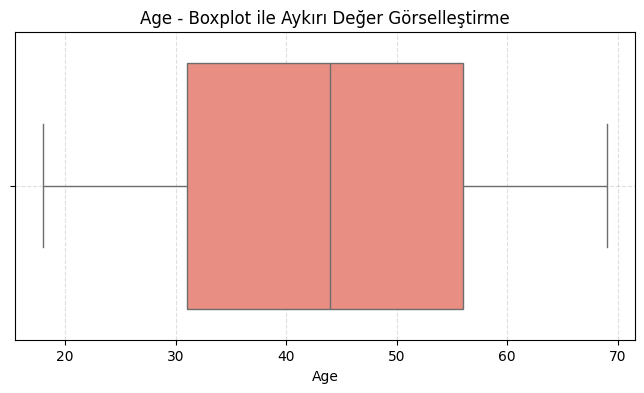

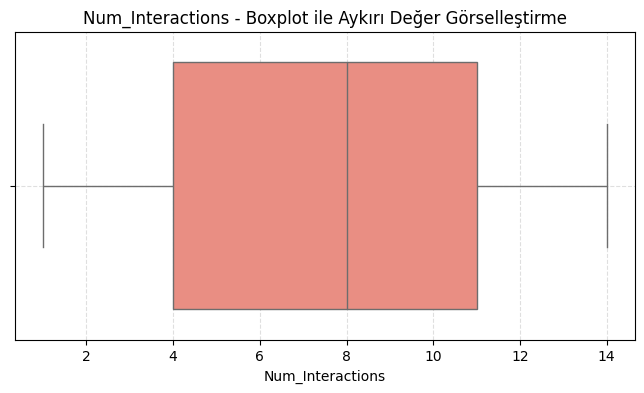

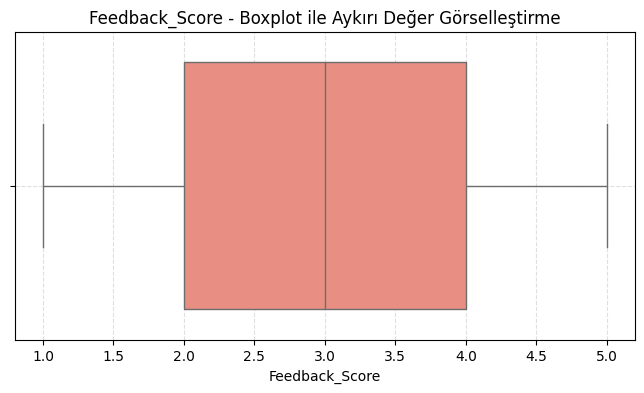

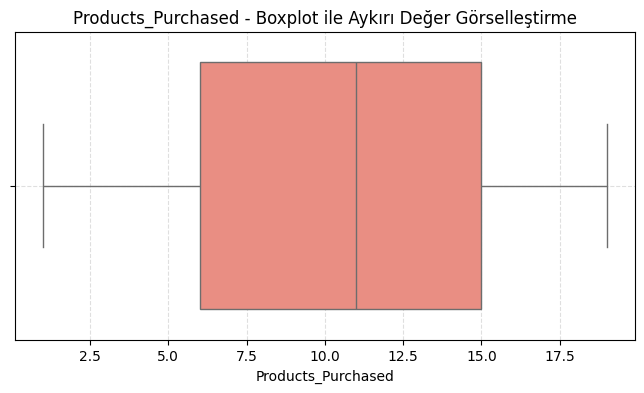

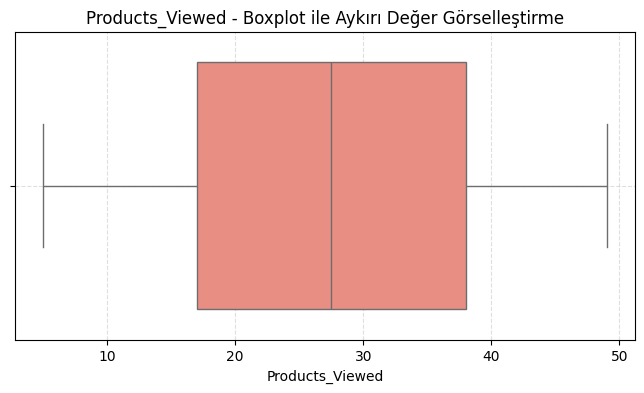

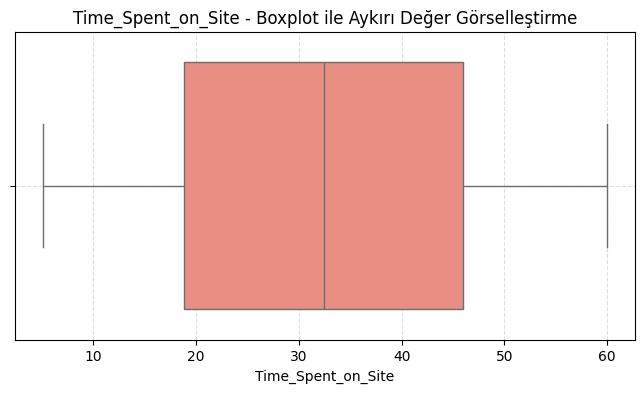

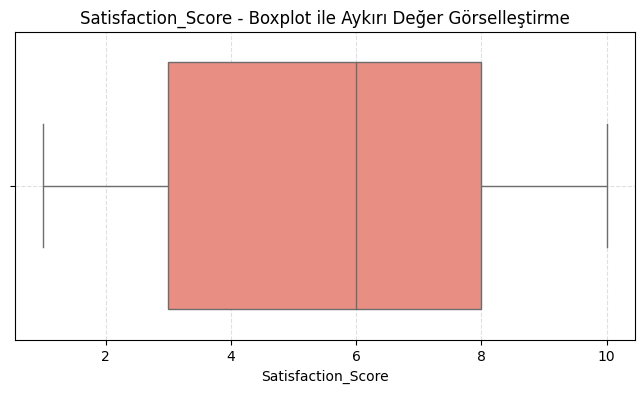

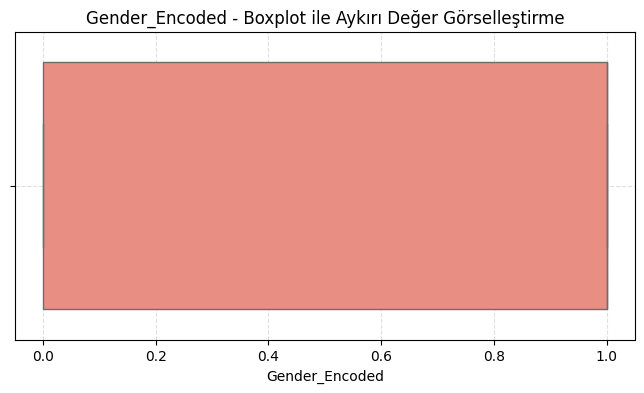

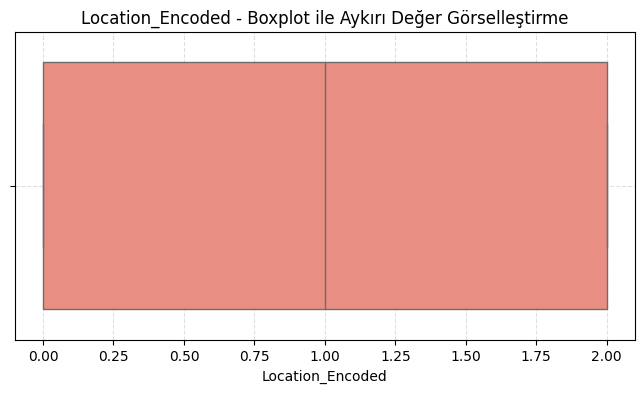

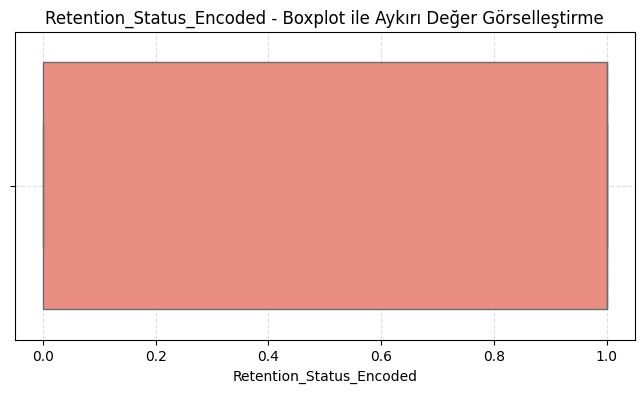

In [24]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'{col} - Boxplot ile Aykırı Değer Görselleştirme')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


### Aykırı Değer Tablosu (Toplu Bakış)

In [25]:
outlier_summary = []

for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Değişken': col,
        'Aykırı Değer Sayısı': len(outliers),
        'Toplam Gözlem': df.shape[0],
        'Yüzde (%)': round((len(outliers) / df.shape[0]) * 100, 2)
    })

pd.DataFrame(outlier_summary)


,Değişken,Aykırı Değer Sayısı,Toplam Gözlem,Yüzde (%)
0,Customer_ID,0,1000,0.0
1,Age,0,1000,0.0
2,Num_Interactions,0,1000,0.0
3,Feedback_Score,0,1000,0.0
4,Products_Purchased,0,1000,0.0
5,Products_Viewed,0,1000,0.0
6,Time_Spent_on_Site,0,1000,0.0
7,Satisfaction_Score,0,1000,0.0
8,Gender_Encoded,0,1000,0.0
9,Location_Encoded,0,1000,0.0


# **EDA Raporu**

## 🎯 Amaç
Bu analizde, veri setinin yapısı keşfedilmiş, sayısal ve kategorik değişkenlerin dağılımları incelenmiş, aykırı değerler ve değişkenler arası ilişkiler değerlendirilmiştir.

---

## 📈 1. Yaş Dağılımı (Age Distribution)

- Her yaş değeri için kişi sayısı barplot ile görselleştirilmiştir.
- Yaşlar oldukça dengeli dağılmış olup, 18–69 aralığında yoğunluk gözlenmiştir.
- Aykırı veya yığılmalı yaş değerleri bulunmamaktadır.

📌 **Gözlem:** Müşteriler geniş yaş aralığında homojen bir şekilde dağılmıştır.

---

## 🚻 2. Cinsiyet Dağılımı (Gender Distribution)

- `Gender` sütununa ait değerler sayılmış ve barplot ile görselleştirilmiştir.
- Kadın ve erkek müşteri sayıları birbirine oldukça yakındır.

📌 **Gözlem:** Veri setinde cinsiyet dağılımı dengelidir → Genellenebilirlik açısından olumlu.

---

## 🧪 3. Geri Bildirim Skoru (Feedback_Score) Dağılımı

- Boxplot ile `Feedback_Score` değişkeni analiz edilmiştir.
- Değerler 1 ile 5 arasında dağılmış, medyan ve çeyrekler dengelidir.
- Aykırı değer bulunmamaktadır.

📌 **Gözlem:** Geri bildirim skorları homojen ve dengeli dağılmıştır. Uç değer gözlemlenmemiştir.

---

## 🛒 4. Satın Alınan ve Görüntülenen Ürünler İlişkisi

- `Products_Purchased` ve `Products_Viewed` ilişkisi barplot ile incelenmiştir.
- Satın alınan ürün sayısı arttıkça, görüntülenen ürün sayısı da genel olarak artmaktadır.

📌 **Gözlem:** Pozitif ilişki mevcuttur; daha fazla görüntüleme → daha fazla satın alma eğilimi.

---

## ♻️ 5. Korelasyon Matrisi (Correlation Heatmap)

- Sayısal değişkenler arasındaki korelasyonlar heatmap ile analiz edilmiştir.
- Korelasyon değerleri -1 ile +1 arasında olup, anlamlı ilişki bulunmamaktadır.

📌 **Gözlem:** `Feedback_Score` ve `Satisfaction_Score` gibi değişkenler arasında güçlü bir korelasyon bulunmamaktadır. Genel korelasyonlar düşüktür.

---

## 🔗 6. Sayısal Değişkenler Arası İlişki (Pairplot)

- `Age`, `Num_Interactions`, `Feedback_Score`, `Satisfaction_Score` gibi değişkenler için pairplot çizilmiştir.
- Scatterplot’lar sayesinde değişkenler arasındaki olası doğrusal veya doğrusal olmayan ilişkiler analiz edilmiştir.

📌 **Gözlem:** Güçlü bir doğrusal ilişki gözlenmemiştir; ancak `Num_Interactions` gibi değişkenlerde gruplaşmalar dikkat çekmektedir.

---

## 🧾 EDA ÖZET TABLOSU

| Alan              | Gözlem                                                                 |
|-------------------|------------------------------------------------------------------------|
| Eksik Değer       | ❌ Eksik değer bulunmamaktadır                                          |
| Aykırı Değerler   | ✅ Yok. Tüm sayısal değişkenler normal sınırlar içinde dağılmıştır       |
| Korelasyon        | 🔎 Genellikle zayıf, anlamlı güçlü korelasyon ilişkileri tespit edilmedi |
| Kullanıcı Davranışı | ✅ Satın alma ile ürün görüntüleme arasında pozitif ilişki mevcut     |

---





# **Veri Temizleme**

📌 Durum:

Eksik değer yok ✅

Aykırı değer yok ✅

Kategorik değişkenler encode edilmiş (örneğin Gender_Encoded, Location_Encoded) ✅

➡️ Bu yüzden ekstra bir veri temizleme adımı gerekli değil.

# **Model ve Tahmin**

Ziyaret başına düşen işlem sayısının tahmin edilmesi site üzerindeki verimliliğin ve yoğunluğun anlaşılmasında etkili olacaktır.



*   Yeni bir sütun oluşturmak gerekmektedir.
*   Bunun için müşterinin geçirdiği zaman başına ne kadar etkileşimde bulunduğunu hesaplamalıyız.
*   `Num_Interactions` ve `Time_Spent_on_Site` verileri bize yardımcı olacak.
*   `Interactions_per_Minute` = `Num_Interactions` / `Time_Spent_on_Site` hesaplamasını kullanarak yeni bir sütun oluşturalım.




In [39]:
df = df[df['Time_Spent_on_Site'] != 0]
df['Interactions_per_Minute'] = df['Num_Interactions'] / df['Time_Spent_on_Site']

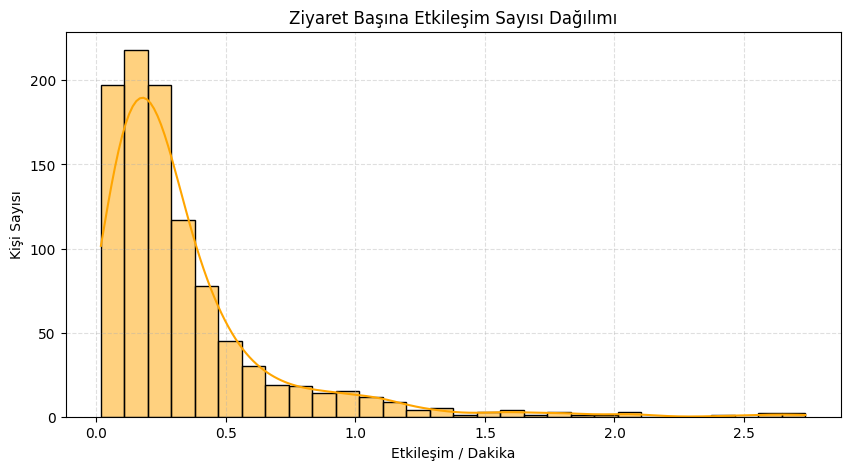

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Interactions_per_Minute'], bins=30, kde=True, color='orange')
plt.title('Ziyaret Başına Etkileşim Sayısı Dağılımı')
plt.xlabel('Etkileşim / Dakika')
plt.ylabel('Kişi Sayısı')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [50]:
# Hedef değişken
y = df['Interactions_per_Minute']

X = df[['Age', 'Products_Viewed', 'Products_Purchased', 'Feedback_Score', 'Satisfaction_Score',
        'Time_Spent_on_Site', 'Gender_Encoded', 'Location_Encoded']]
# Özellik seçimi: hedefin kendisi dışında anlamlı olan sayısal/kategorik değişkenler
X = df.drop(['Interactions_per_Minute', 'Customer_ID', 'Engagement_Level'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True)

## Veriyi Test ve Train olarak Bölme

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Modeli

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Modeli oluştur
dt_model = DecisionTreeRegressor(random_state=42)

# Eğit
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

### Tahmin ve Değerlendirme

In [61]:
# Tahmin
dt_pred = dt_model.predict(X_test)

# Değerlendirme metrikleri
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"📊 Decision Tree RMSE: {dt_rmse:.4f}")
print(f"📊 Decision Tree MAE: {dt_mae:.4f}")
print(f"📊 Decision Tree R² Score: {dt_r2:.4f}")


📊 Decision Tree RMSE: 0.0484
📊 Decision Tree MAE: 0.0262
📊 Decision Tree R² Score: 0.9821


### Gerçek ve Tahmin Grafiği + Özelliklerin Tahmine Katkısı Grafiği

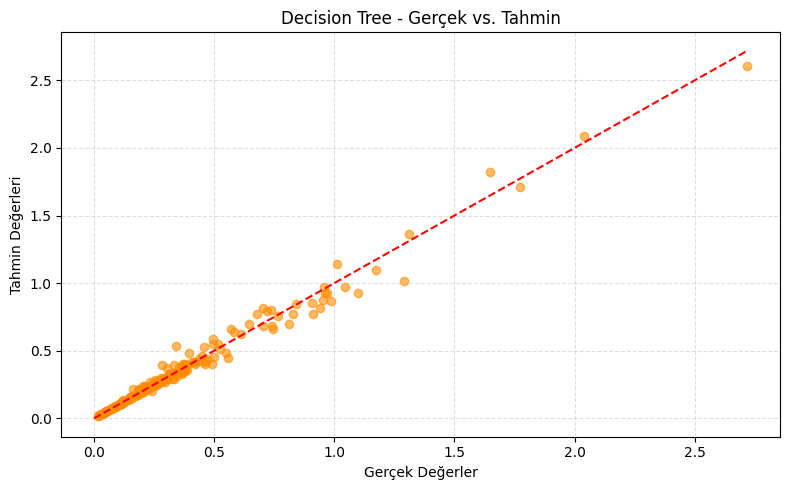

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, dt_pred, alpha=0.6, color='darkorange')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Decision Tree - Gerçek vs. Tahmin')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

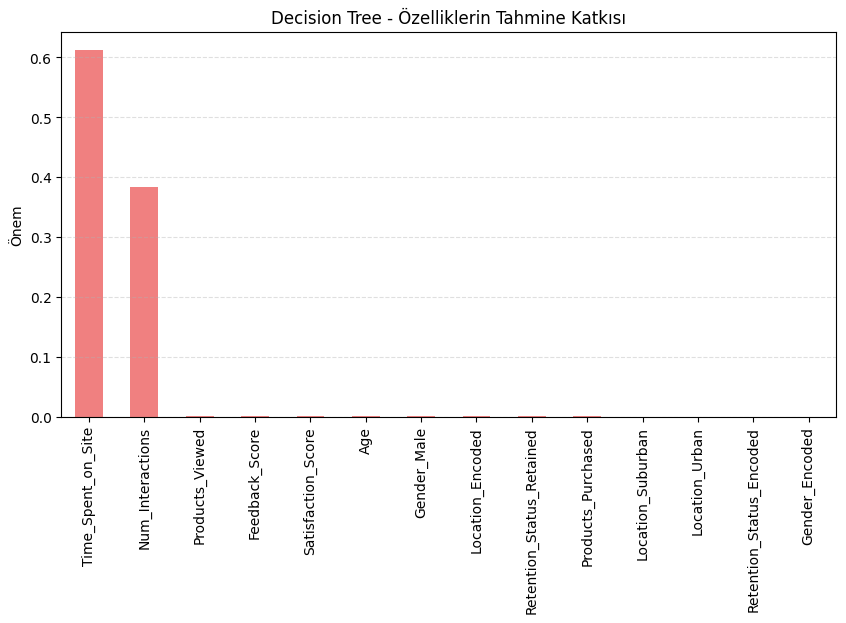

In [64]:
import pandas as pd

dt_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
dt_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='lightcoral')
plt.title("Decision Tree - Özelliklerin Tahmine Katkısı")
plt.ylabel("Önem")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()

## Random Forest Modeli

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Değerlendirme

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Random Forest RMSE: {rmse:.4f}")
print(f"📊 Random Forest MAE: {mae:.4f}")
print(f"📊 Random Forest R² Score: {r2:.4f}")

📊 Random Forest RMSE: 0.0423
📊 Random Forest MAE: 0.0159
📊 Random Forest R² Score: 0.9863


### Gerçek ve Tahmin Grafiği + Özelliklerin Tahmine Katkısı Grafiği

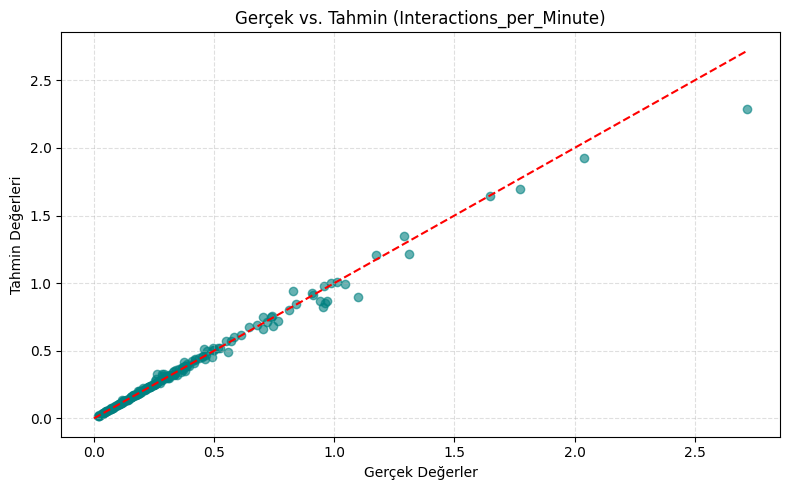

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Gerçek vs. Tahmin (Interactions_per_Minute)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


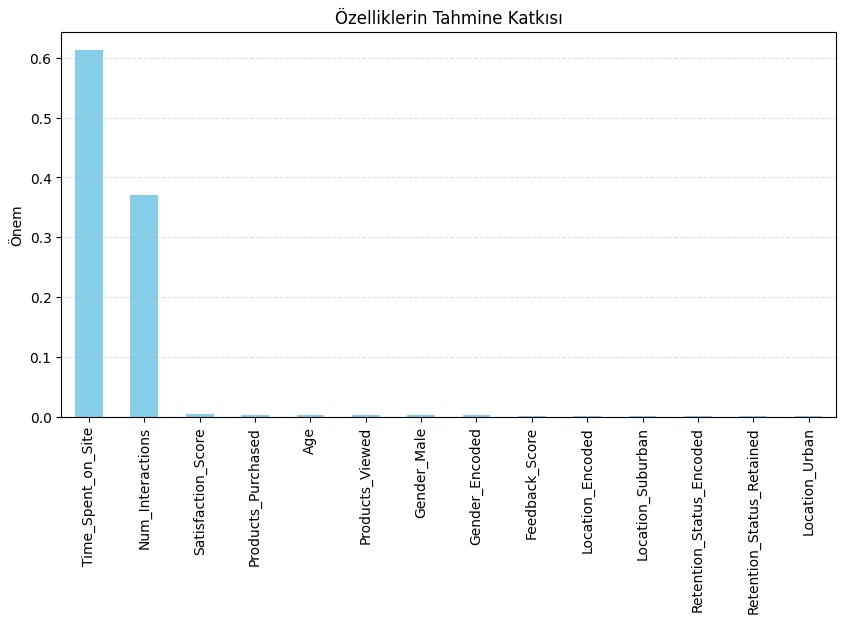

In [56]:
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Özelliklerin Tahmine Katkısı")
plt.ylabel("Önem")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()

# **Modelleri Karşılaştırma**


## 📈 Model Karşılaştırması

| Model               | RMSE (Hata) | MAE (Ortalama Hata) | R² Score (Açıklayıcılık) |
|---------------------|-------------|----------------------|---------------------------|
| **Random Forest**   | ✅ **0.0423** | ✅ **0.0159**         | ✅ **0.9863**              |
| **Decision Tree**   | ❗ 0.0484    | ❗ 0.0262              | ❗ 0.9821                   |

---

## 📌 Yorumlar ve Sonuç

- **Random Forest**, daha düşük hata oranı ve daha yüksek açıklayıcılık oranı ile bu tahminleme görevi için daha başarılı olmuştur.
- Özellikle `Time_Spent_on_Site` ve `Num_Interactions` gibi temel değişkenler modelin tahmin başarısında belirleyici olmuştur.
- **Decision Tree** ise daha sade bir yapıya sahip olsa da genelleme gücü Random Forest'a göre zayıftır.
